In [32]:
from lyricsgenius import Genius
import re
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from wordcloud import WordCloud
from nltk.corpus import stopwords
from string import punctuation
import spacy

# Set up Genius API key and artist name
token = "UE498H-PVYkklJl02EC9NsocJuCiHZ32nrNhdXHlVb_BTVwtags81V7Y8OKCgX9P"
genius = Genius(token)
genius.remove_section_headers = True
genius.verbose = False
genius.skip_non_songs = True
genius.excluded_terms = ["(Remix)", "(Live)"]

# Fetch artist's songs from Genius
def fetch_artist_songs(artist_name):
    artist = genius.search_artist(artist_name, max_songs=10)
    lyrics = artist.save_lyrics(filename='artist.txt', extension='txt')
    
    return lyrics
   


In [51]:

# Preprocess lyrics:
def preprocess_lyrics(lyrwords):
  
    lyrwords = tokenize()
    tokenized = filter_non_eng(lyrwords)
    lemmas = lemmatizing(tokenized)
    result = filter_stopwords(lemmas)
    
   
    return result


# Tokenize,
#making a list of all words from lyrics
def tokenize():
    
    #loading Russian language model
    nlp = spacy.load('ru_core_news_sm')
    
    with open('artist.txt', 'r') as inputfile:
        lyrwords = nlp(inputfile.read())
     
    #get only nouns , verbs, adjectives, adverbs tokens
    tokens = [token for token in lyrwords if token.pos_ == "NOUN" or token.pos_ == "VERB" or token.pos_ == "ADJ" or token.pos_ == "ADV"]
    
    return tokens

#filtering non-Russian words:
def filter_non_eng(words):
    
    #regex for noise *.embed and no-Russian characters,some punctuation marks, one-character words
    r_embed = re.compile('[а-яА-ЯёЁ0-9!?-]+(E|e)mbed|[a-zA-z0-9]+|л(а|я)|тра|на|х(э|е)й|х(и|е|у|а|ы|о)|а(и|у)|к(а|у)|-|[а-яА-ЯёЁ]{1}$')
    embed_noise = []

    for word in words:
        if re.match(r_embed, word.text):
            embed_noise.append(str(word.text))
    
    #token to list
    token_list = [word.text for word in words]
    #print(token_list)
        
    embed_filtered = list(filter(lambda x: x not in embed_noise, token_list))
    
    return embed_filtered

#pre-processing
#filtering the lyrics from stopwords
def filter_stopwords(words):
    
    #filtering stopwords:
    rus_stop = stopwords.words("russian")
    
    #lowen all the words to gain clearer visibility
    fin_lemmas = [word for word in words if word not in rus_stop]

    return fin_lemmas

#pre-processing:
#lemmatization
def lemmatizing(words):
    
    #lemmatize
    tokens = nlp(' '.join(words))
    lemmas = [token.lemma_ for token in tokens]
    
    return lemmas

In [52]:
# Count word frequencies
def count_word_frequencies(lyrics):
    
    word_freq = pd.Series(lyrics).value_counts()
    word_freq[:100]
    
    return word_freq



In [53]:
# word cloud
def create_word_cloud(word_frequencies):
    #Generate word cloud
    wc = WordCloud(width=800, height=600, max_words=2000, background_color='white').generate_from_frequencies(word_frequencies)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()



Please enter the artist's name in Cyrillic!Ногу Свело!
artist.txt already exists. Overwrite?
(y/n): y
Wrote artist.txt.


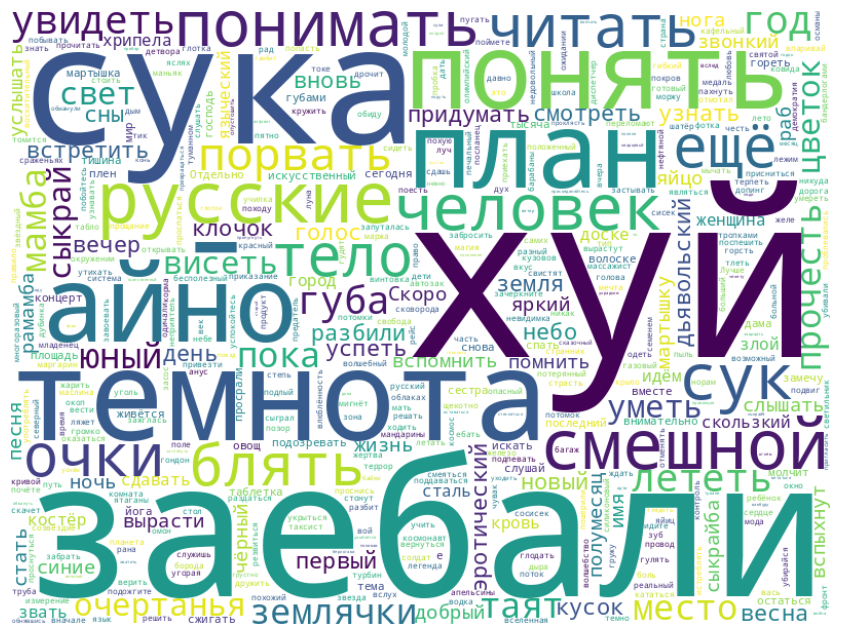

In [54]:
# Main function
if __name__ == '__main__':
    
    nlp = spacy.load('ru_core_news_sm')
    
    # Fetch artist's songs
    userinput = input("Please enter the artist's name in Cyrillic!")
    songs = fetch_artist_songs(userinput)

    #tokenization, filtering, stop-words, lemmatization
    preprocessed_lyrics = preprocess_lyrics(songs)

    #counting word_frequences
    word_frequencies = count_word_frequencies(preprocessed_lyrics)

    # Create and display the word cloud
    create_word_cloud(word_frequencies)
